In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ml_datasets.esl import ProstateCancer
from sklearn import linear_model
from sklearn import datasets
from esl.utils import scale

In [8]:
prostate_cancer = ProstateCancer(verbose=0)
df = prostate_cancer.load()
# extract input and output dataframe
train_test = prostate_cancer.train_test
df_x = df[prostate_cancer.meta[:-1]]
df_y = df[prostate_cancer.meta[-1]]

x_train = scale(df_x[train_test=='T'].copy()).values
y_train =  df_y[train_test=='T'].copy().values

..

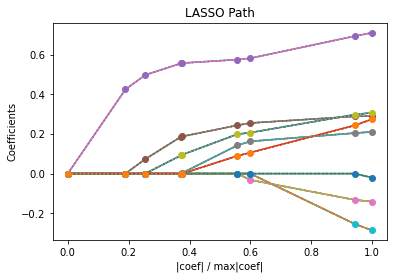

In [17]:
X = x_train.copy()
y = y_train - np.mean(y_train)

_, _, coefs = linear_model.lars_path(X, y, method='lar', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
for i in range(X.shape[1]):
#     print(reg.coef_path_[i, i])
    plt.plot(xx, coefs[i, :], '+--', label='beta_' + str(i + 1))

ymin, ymax = plt.ylim()
# plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
# plt.legend()
plt.axis('tight')
_, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
for i in range(X.shape[1]):
#     print(reg.coef_path_[i, i])
    plt.plot(xx, coefs[i, :], 'o:', label='beta_' + str(i + 1))

ymin, ymax = plt.ylim()
# plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
# plt.legend()
plt.axis('tight')
plt.show()

In [18]:
n, p = X.shape
beta = np.zeros(p)
# sign = np.zeros(p)
r = y.copy()
corr = X.T @ r
best_feat = np.argmax(np.abs(corr))
A = [best_feat]
d = np.zeros(p)
beta_path = np.zeros((p, p + 1))
for i in range(1, p + 1):
    d[A] = np.linalg.inv(X[:, A].T @ X[:, A]) @ X[:, A].T @ r
    alpha = 1.0
    for j in range(p):
        if j in A:
            continue
        alpha_temp = dict()
        alpha_temp['+'] = (corr[best_feat] - corr[j]) / (corr[best_feat] - (X @ d).T @ X[:, j])
        alpha_temp['-'] = (corr[best_feat] + corr[j]) / (corr[best_feat] + (X @ d).T @ X[:, j])

        for key in alpha_temp.keys():
            if alpha_temp[key] < 0:
                alpha_temp[key] = np.inf

            if alpha_temp[key] < alpha:
                alpha = alpha_temp[key]
                best_feat_temp = j
        
    beta[A] = beta[A] + alpha * d[A]      
    beta_path[:, i] = beta
    r = r - alpha * (X[:, A] @ d[A])
    A.append(best_feat_temp)
    corr = X.T @ r
    best_feat = best_feat_temp

[ 0.71104059  0.29045029 -0.14148182  0.21041951  0.30730025 -0.28684075
 -0.02075686  0.27526843]
[[ 0.          0.4247431   0.49773924  0.55680594  0.55796995  0.57534936
   0.58204348  0.69414674  0.71104059]
 [ 0.          0.          0.07299614  0.18636869  0.18756536  0.24378174
   0.25530452  0.28881767  0.29045029]
 [ 0.          0.          0.          0.          0.          0.
  -0.03184655 -0.13274263 -0.14148182]
 [ 0.          0.          0.          0.          0.00355247  0.14242635
   0.16263671  0.2046797   0.21041951]
 [ 0.          0.          0.          0.09226023  0.09554027  0.19879884
   0.20666828  0.29806058  0.30730025]
 [ 0.          0.          0.          0.          0.          0.
   0.         -0.2545374  -0.28684075]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.         -0.02075686]
 [ 0.          0.          0.          0.          0.          0.08940577
   0.10584993  0.24336962  0.27526843]]


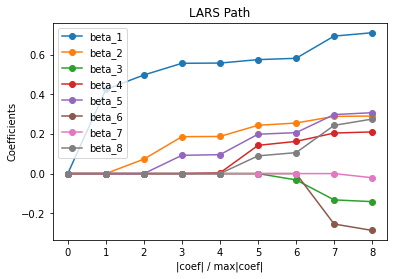

In [20]:
print(beta)
print(beta_path)
for i in range(p):
    plt.plot(beta_path[i, :], 'o-', label='beta_' + str(i + 1))
ymin, ymax = plt.ylim()
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LARS Path')
plt.legend()
plt.axis('tight')
plt.show()